**<font size="+3">04 Zeitreihe als stochastischer Prozess</font>**

In [1]:
import pandas as pd
import numpy as np
#import datetime
from IPython.display import display
from IPython.display import Image

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5

<b>Was sagt ChatGPT dazu?</b>

<img src="pics/chat-gtp-20231022-stochstic-processes.JPG" alt="Drawing" style="width: 700px;"/>

# Folge Zufallsvariablen

**Zeitreihen werden mathematisch als Folgen von Zufallsvariablen modelliert**  
<ul>
<li>Werte einer Zeitreihe werden von vielen Faktoren beeinflusst
<li>Es ist unmöglich, alle Faktoren zu ermitteln, zu messen, oder deren Einflüsse zu verstehen
<li>Daher liegt es nahe, die Werte einer Zeitreihe als Realisation einer Folge von Zufallsvariablen zu modellieren<br>
    (Pfad eines stochastischen Prozesses)
</ul>

**Wie erfolgt eine solche Modellierung?**  

* Die Werte einer Zeitreihe $x_1, x_2, \ldots, x_n$ werden als <b>Realisationen</b><br>einer Folge von $n$ Zufallsvariablen ($X_1,X_2, \ldots X_n$) betrachtet
* Achtung: die Werte der Zeitreihe sind NICHT Realisationen EINER Zufallsvariablen,<br>sondern von $n$ (i.A. unterschiedlichen) Zufallsvariablen (andernfalls wäre es sehr viel einfacher)
* Für jeder einzelne Zufallsvariable liegt in der Zeitreihe (leider) nur ein Wert vor
* Spannend ist, dass die Zufallsvariablen i.A. voneinander abhängig sind.
* Bsp: Die Temperatur zu einem Zeitpunkt ist sehr von der direkt davor gemessenen Temperatur abhängig.
</ul>

**Eine Folge von Zufallsvariablen bezeichnet man auch als stochastischen Prozess.**

<i>Wikipedia: Stochastischer Prozess</i><br>
https://de.wikipedia.org/wiki/Stochastischer_Prozess

# Erzeugung Zeitreihen

Zunächst wird ein Funktion **plot_ts** angeführt, die aus einer Liste von Werte zunächst ein DataFrame mit einem datetimeindex erzeugt, und die erzeugte Zeitreihe visualisiert.

In [3]:
def plot_ts(values,title):
    start = pd.Timestamp(2023, 1, 1)
    dti = pd.date_range(start, periods= 100, freq='d')  # datetimeindex

    df = pd.DataFrame(values, index= dti, columns=['values'])

    # Plot
    plt.title(title, size=20)
    plt.plot(df.index, df.values)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.grid();

## IID Zufallsvariablen

**Zum Begriff IID**  

* IID = independent and identically distributed  
* Verschiedene Zufallsvariablen sind IID, wenn diese dieselben Verteilung besitzen, und voneinander unabhängig sind  
* in diesem Fall hat die Zufallsvariable $X_1$ dieselbe Verteilung wie $X_2, \ldots, X_n$.

### Normalverteilung

Zur Info:  
Mit $N(\mu,\sigma^2)$ wird eine Normalverteilung mit dem Erwartungswert $\mu$ und der Varianz $\sigma^2$ bezeichnet.  
Folgt eine Zufallsvariable $X$ dieser Dichtefunktion schreibt man: $X \sim N(\mu,\sigma^2)$.

**Beispiel: Jeder Zeitreihenwert ist hier eine Realisierung einer normalverteilten Zufallsvariable N(6,4).**  

<b>numpy.random.randn():</b> Return a sample (or samples) from the “standard normal” distribution.

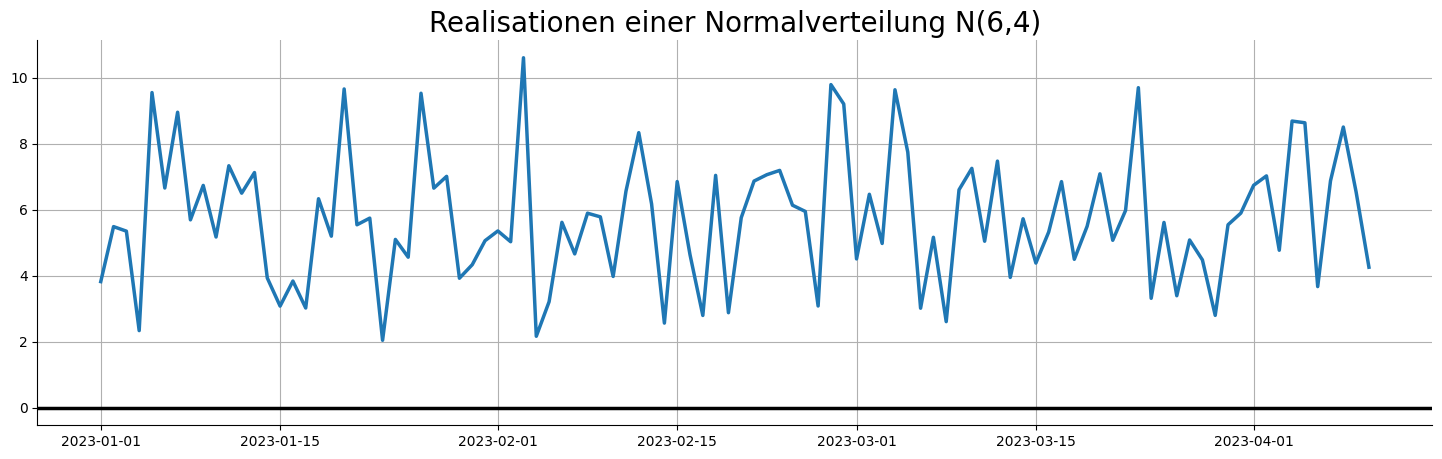

In [4]:
values = 2*np.random.randn(100) + 6
plot_ts(values,'Realisationen einer Normalverteilung N(6,4)')

Bei einer Normalverteilung liegt 68% der Masse innerhalb einer Standardabweichung vom Mittelwert.

In [5]:
sum(abs(values - 6) < 2) / len(values)

np.float64(0.65)

### Gleichverteilung

Mit $U (a,b)$ wird eine stetige Gleichverteilung mit dem Intervall $[a;b]$ bezeichnet.

**Beispiel: Jeder Zeitreihenwert ist eine Realisierung einer Gleichverteilung im Intervall 3 bis 6.**

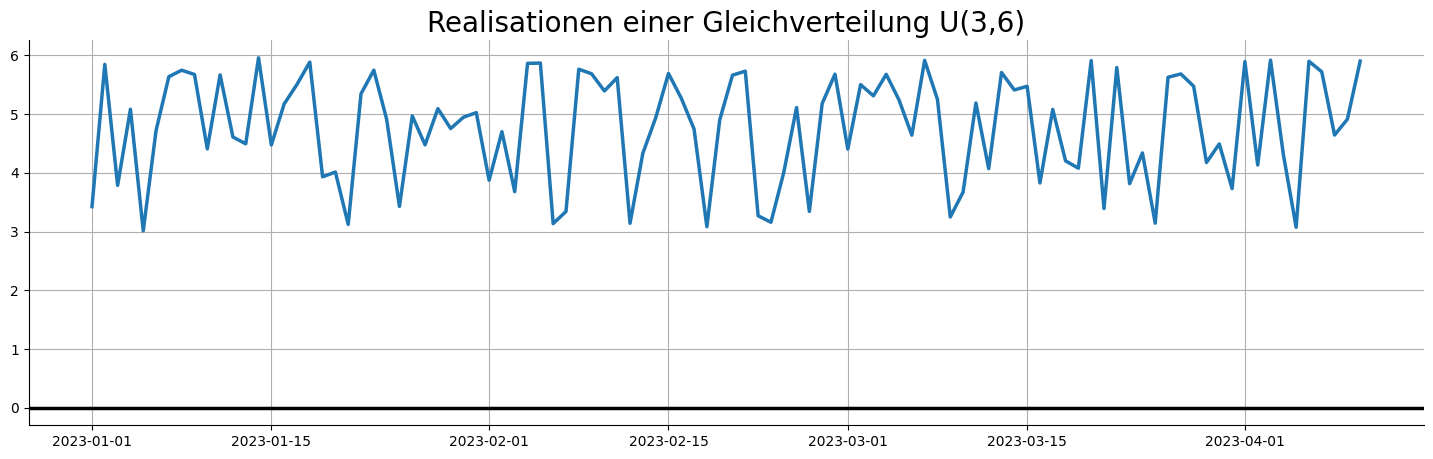

In [6]:
values = np.random.uniform(3,6,100)
plot_ts(values, 'Realisationen einer Gleichverteilung U(3,6)')

## Nicht-IID Zufallsvariablen

### Versch. Verteilungen

**Beispiel: Der Mittelwert der normalverteilten Zufallsvariablen steigt mit der Zeit an**

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nylux\AppData\Local\Temp\ipykernel_960\2645114495.py:4: SyntaxWarning: invalid escape sequence '\s'
  plot_ts( values, 'Realisationen einer Normalverteiltung mit steigendem Mittelwert und $\sigma^2 = 16$' )


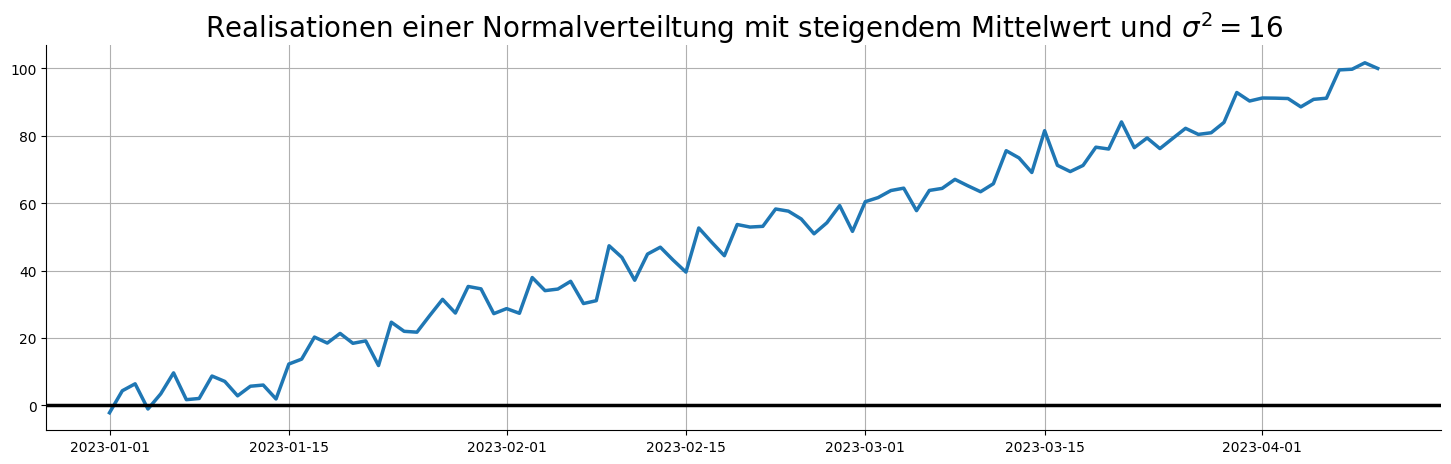

In [7]:
values = []
for i in np.arange(100):  # Werte von 0 bis 99
    values.append( 4*np.random.randn(1) + 1*i )
plot_ts( values, 'Realisationen einer Normalverteiltung mit steigendem Mittelwert und $\sigma^2 = 16$' )

### Abhängige Verteilungen

**Beispiel: Beginnend mit dem Wert 0 wird für den folgenden Wert ein normalverteilter Wert addiert.**

In [8]:
values = [0]
for i in np.arange(100):  # Werte von 0 bis 99
    values.append( values[-1] + np.random.randn(1) )
plot_ts( values, 'Realisationen mit standardnormalverteilten Zuwächsen' )

ValueError: Shape of passed values is (101, 1), indices imply (100, 1)

# Konklusio

<b>
<ul>
<li>mit der Modellierung einer Zeitreihe als eine Folge von Zufallsvariablen lassen sich Zeitreihen erzeugen
<li>ein stochastischer Prozess (Folge von Zufallsvariablen) ist das theoretische Gegenstück zu einer
empirischen Zeitreihe.
<li>Somit können stochastische Prozesse als Modelle für Zeitreihen verwendet werden.
<ul>
</b>